# 4. Data Visualization I 

1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information 
about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library 
to see if we can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each
 passenger is distributed by plotting a histogram.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## 4.1. Preprocessing


### 4.1.1. Structure of the dataset

```
survival	Survival	0 = No, 1 = Yes
pclass      Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
```

In [15]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,<NA>,S


In [2]:
ds = pd.read_csv( "titanic.csv" )
print( ds.shape )
ds.describe()

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 4.1.2. Correcting data-types

In [4]:
ds = ds.astype( { 
    "Name": "string" , 
    "Sex": "string" , 
    "Ticket": "string"  , 
    "Cabin": "string"  , 
    "Embarked": "string"  , 
} )
ds.dtypes

PassengerId             int64
Survived                int64
Pclass                  int64
Name           string[python]
Sex            string[python]
Age                   float64
SibSp                   int64
Parch                   int64
Ticket         string[python]
Fare                  float64
Cabin          string[python]
Embarked       string[python]
dtype: object

### 4.1.3. Handling missing values

In [5]:
# Check number of missing values
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

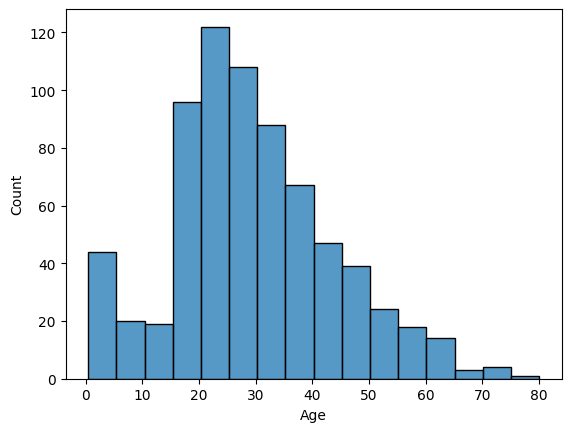

In [6]:
# Check statistics of columns with missing values
print( ds[ "Age" ].describe() )
sns.histplot( data=ds , x="Age" , bins=16 )

## 4.2. Exploratory Data Analysis

### 4.2.1. Visualization of each feature with target class `Survived`

Observation: Pclass = 3 (third class) passengers survived the least and Pclass = 1 (first class) passengers survived the most

<Axes: xlabel='Pclass', ylabel='count'>

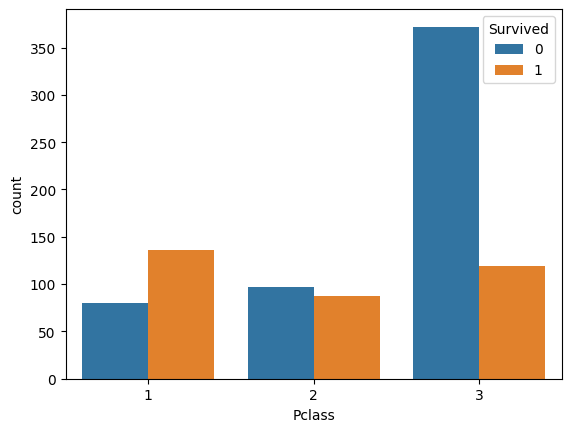

In [11]:
# PClass vs Survived
sns.countplot( data=ds , x="Pclass" , hue="Survived" )

Observation: Males survived least, females the most

<Axes: xlabel='Sex', ylabel='count'>

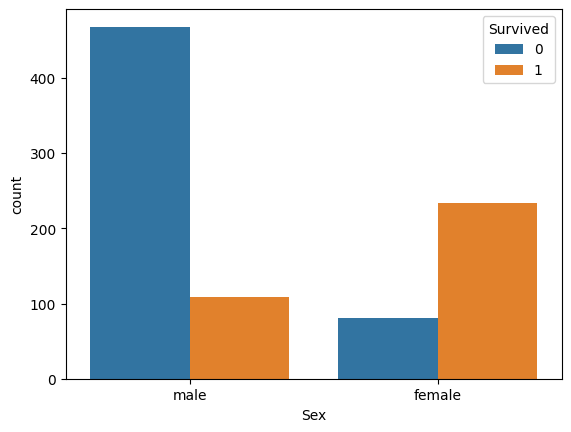

In [8]:
# Sex vs. Survived
sns.countplot( data=ds , x="Sex" , hue="Survived" )

Observation: The distribution of the age of passengers who survived appears to have a smaller median than that of the passengers who didn't survived, indicating younger passengers survived most

<Axes: xlabel='Survived', ylabel='Age'>

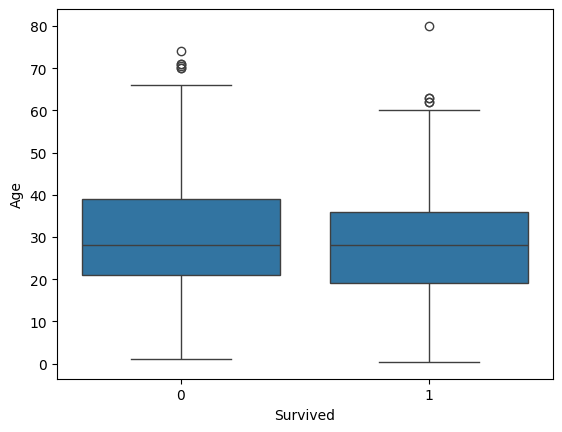

In [12]:
# Age vs. Survived
sns.boxplot( data=ds , x="Survived" , y="Age" )

Observation: Most passengers which survived or didn't survive embarked the Titanic from Southampton

<Axes: xlabel='Embarked', ylabel='count'>

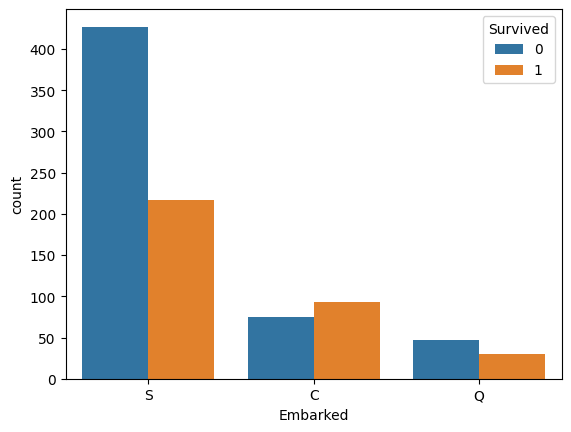

In [13]:
# Embarked vs. Survived
sns.countplot( data=ds , x="Embarked" , hue="Survived" )

Observation: As first class passengers survived the most, passengers with higher fare survived, assuming the fact that first-class had a higher fare than other classes

<Axes: xlabel='Survived', ylabel='Fare'>

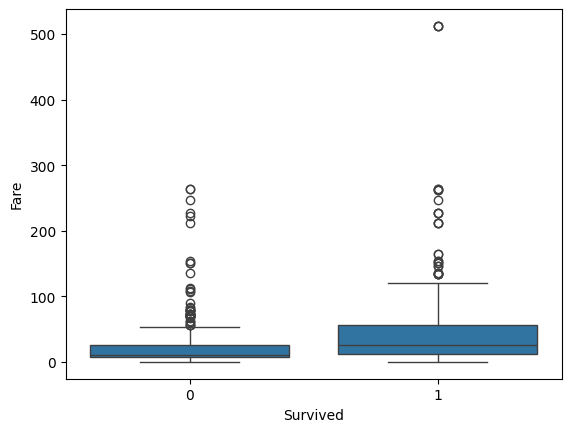

In [14]:
# Fare vs. Survived
sns.boxplot( data=ds , x="Survived" , y="Fare" )

<Axes: xlabel='SibSp', ylabel='count'>

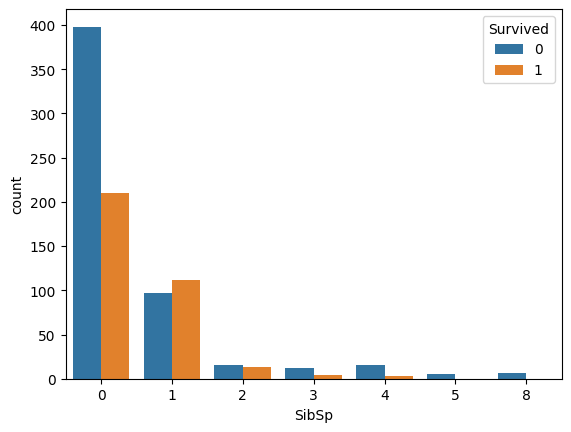

In [17]:
# SibSp vs. Survived
sns.countplot( data=ds , x="SibSp" , hue="Survived" )

<Axes: xlabel='Parch', ylabel='count'>

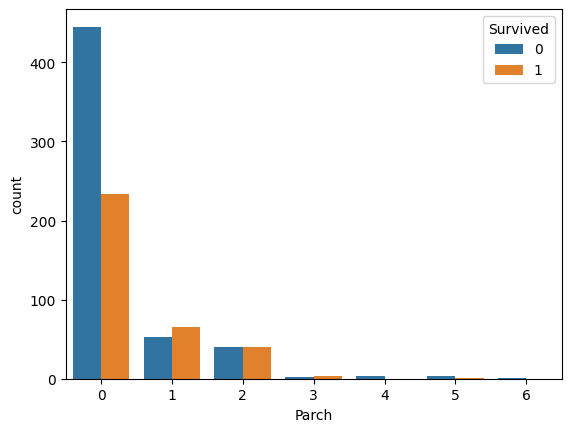

In [18]:
# Parch vs. Survived
sns.countplot( data=ds , x="Parch" , hue="Survived" )

<Axes: xlabel='Fare', ylabel='Count'>

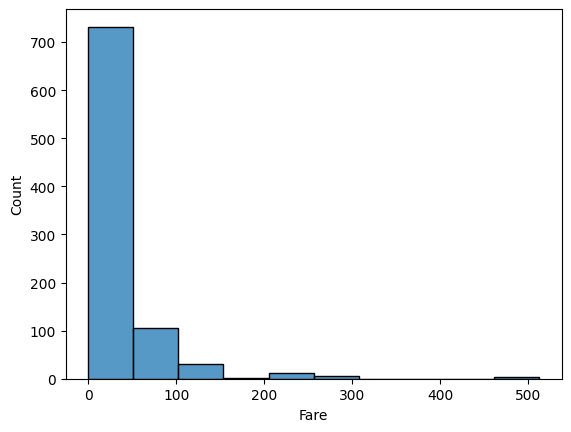

In [20]:
sns.histplot( data=ds , x="Fare" , bins=10 )